In [2]:
!pip install sklearn-som

In [3]:
from sklearn_som.som import SOM
import pandas as pd
from sklearn.preprocessing import StandardScaler


In [12]:
df = pd.read_csv('./breast-cancer-wisconsin.csv')


cancer_labels = df.iloc[:, -1]
cancer_data = df.iloc[:, 1:-1]

print(cancer_labels.head())
print(cancer_data.head())


# Convert to numpy arrays
cancer_labels = cancer_labels.values
cancer_data = cancer_data.values

# Normalize the data
scaler = StandardScaler()
cancer_data = scaler.fit_transform(cancer_data)

0    2
1    2
2    2
3    2
4    2
Name: class, dtype: int64
   clump_thickness  uniformity_of_cell_size  uniformity_of_cell_shape  \
0                5                        1                         1   
1                5                        4                         4   
2                3                        1                         1   
3                6                        8                         8   
4                4                        1                         1   

   marginal_adhesion  single_epithelial_cell_size  bare_nuclei  \
0                  1                            2            1   
1                  5                            7           10   
2                  1                            2            2   
3                  1                            3            4   
4                  3                            2            1   

   bland_chromatin  normal_nucleoli  mitoses  
0                3                1        1  
1        

In [19]:
cancer_som = SOM(2,1, cancer_data[0].shape[0])
cancer_som.fit(cancer_data)

In [20]:
predictions = cancer_som.predict(cancer_data)

In [21]:
print(predictions)

[0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0
 1 1 1 1 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1 1 0 0 1 0 1 1 0
 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 1
 1 0 0 0 1 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1
 1 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 1 0 1 1 1 0 1
 1 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 1 1 0 1 1
 0 1 1 1 1 1 0 1 1 1 1 0 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 1 0 1
 1 1 0 1 0 1 0 0 0 0 0 1 0 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 1 0 1 1 0 0
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0
 0 1 1 0 0 1 1 0 0 0 1 1 1 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0
 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 

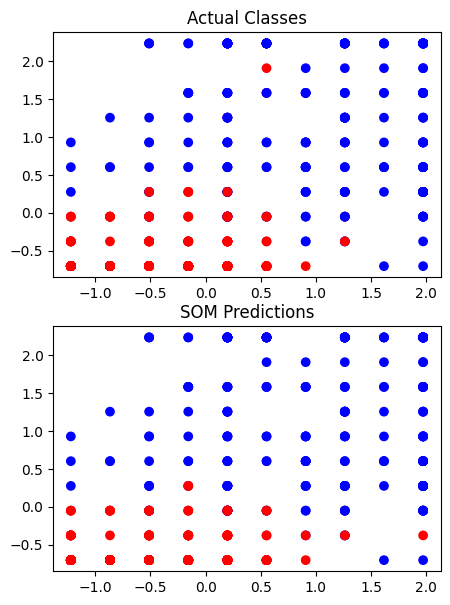

In [22]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
# Plot the results
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(5,7))
x = cancer_data[:,0]
y = cancer_data[:,1]
colors = [ 'red', 'green', 'blue']

ax[0].scatter(x, y, c=cancer_labels, cmap=ListedColormap(colors))
ax[0].title.set_text('Actual Classes')
ax[1].scatter(x, y, c=predictions, cmap=ListedColormap(colors))
ax[1].title.set_text('SOM Predictions')
plt.show()